In [2]:
import numpy as np
import subprocess
import os
import sys
import shutil
import matplotlib.pyplot as plt



In [3]:
def plot_scores(scores, n):
    nsc = np.array(scores)
    avg_scores = np.average(nsc, 0)
    movavg = np.convolve(avg_scores, np.ones(n), 'valid')/n
    plt.plot(movavg)

In [37]:
# How man runs it should average over.
NB_RUNS = 1

NB_EPISODES = 10000

dir_path = os.path.dirname(os.path.realpath(__vsc_ipynb_file__))
os.chdir(dir_path)
OPPONENT = "simpleai.json"
SELF = "cnn30000.json"
FTEMP = "AVG_PERF_TEMP_AI_FILE.json"
COMMAND = "../target/release/connect4"


In [38]:
scores = []
for i in range(NB_RUNS):
    print(i)
    # So that the starting ai remains the same over all runs.
    shutil.copy(SELF, FTEMP)
    out = subprocess.check_output([COMMAND, "train-against", FTEMP, OPPONENT, "--iterations", str(NB_EPISODES), '-s'])
    l = np.array(eval(out))
    #print(np.mean(l[:]))
    scores.append(l)
    


0


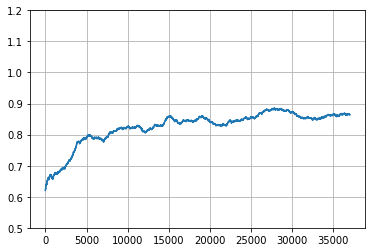

In [40]:
plot_scores(scores, 3000)
#plot_scores(long_cnn_scores, 500)
#plot_scores(lr0_0001e0_1_scores,100)
#plot_scores(lr0_001r0_1_scores, 100)
#plot_scores(lr0_01e0_1_scores, 100)
plt.ylim([0.5,1.2])
plt.grid()
plt.show()

In [1]:
#lr0_0001e0_1_scores = scores
#lr0_01e0_1_scores = scores
#lr0_001r0_1_scores = scores
#cons_scores = scores
#cnn_scores = scores
#long_cnn_scores = scores

In [2]:
%store cons_scores
%store cnn_scores
%store long_cnn_scores
%store lr0_001r0_1_scores
%store lr0_01e0_1_scores
%store lr0_0001e0_1_scores

Stored 'cons_scores' (ndarray)
Stored 'cnn_scores' (ndarray)
Stored 'long_cnn_scores' (list)
Stored 'lr0_001r0_1_scores' (list)
Stored 'lr0_01e0_1_scores' (list)
Stored 'lr0_0001e0_1_scores' (list)
